Found 234 normal images in the specified directory.
The dimensions of the first image are: (1949, 1632)


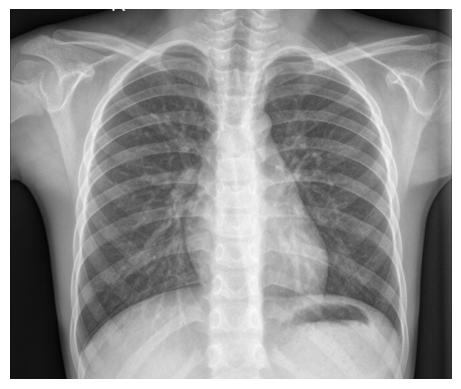

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# If we want to import the pictures from google drive into colab, we can also do that...

# Set the path to your image directory
normal_images_dir = '../../data/test/NORMAL'  # Adjust this to match your folder structure

# List all files in the folder
normal_images = [f for f in os.listdir(normal_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of images found
print(f"Found {len(normal_images)} normal images in the specified directory.")

# Load the first image
if normal_images:
    first_image_path = os.path.join(normal_images_dir, normal_images[0])
    first_image = Image.open(first_image_path)
    print(f"The dimensions of the first image are: {first_image.size}")
    
    # Display the first image
    plt.imshow(first_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No images found in the specified directory.")


Found 390 pneumonia images in the specified directory.
The dimensions of the first pneumonia image are: (1120, 808)


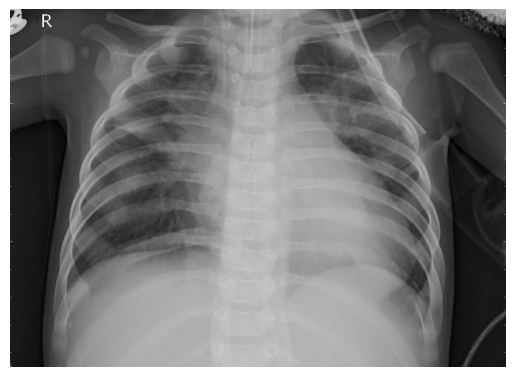

In [2]:
# Now let's import the images with pneumonia
pneumonia_images_dir = '../../data/test/PNEUMONIA'

# List all the pneumonia images
pneumonia_images = [f for f in os.listdir(pneumonia_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of pneumonia images found
print(f"Found {len(pneumonia_images)} pneumonia images in the specified directory.")

# Load the first pneumonia image
if pneumonia_images:
    first_pneumonia_image_path = os.path.join(pneumonia_images_dir, pneumonia_images[0])
    first_pneumonia_image = Image.open(first_pneumonia_image_path)
    print(f"The dimensions of the first pneumonia image are: {first_pneumonia_image.size}")
    
    # Display the first pneumonia image
    plt.imshow(first_pneumonia_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

We can see that both images are not of the same dimension and we can see it in the sample pictures, so these will need to be scaled once we feed them into the pretrained models

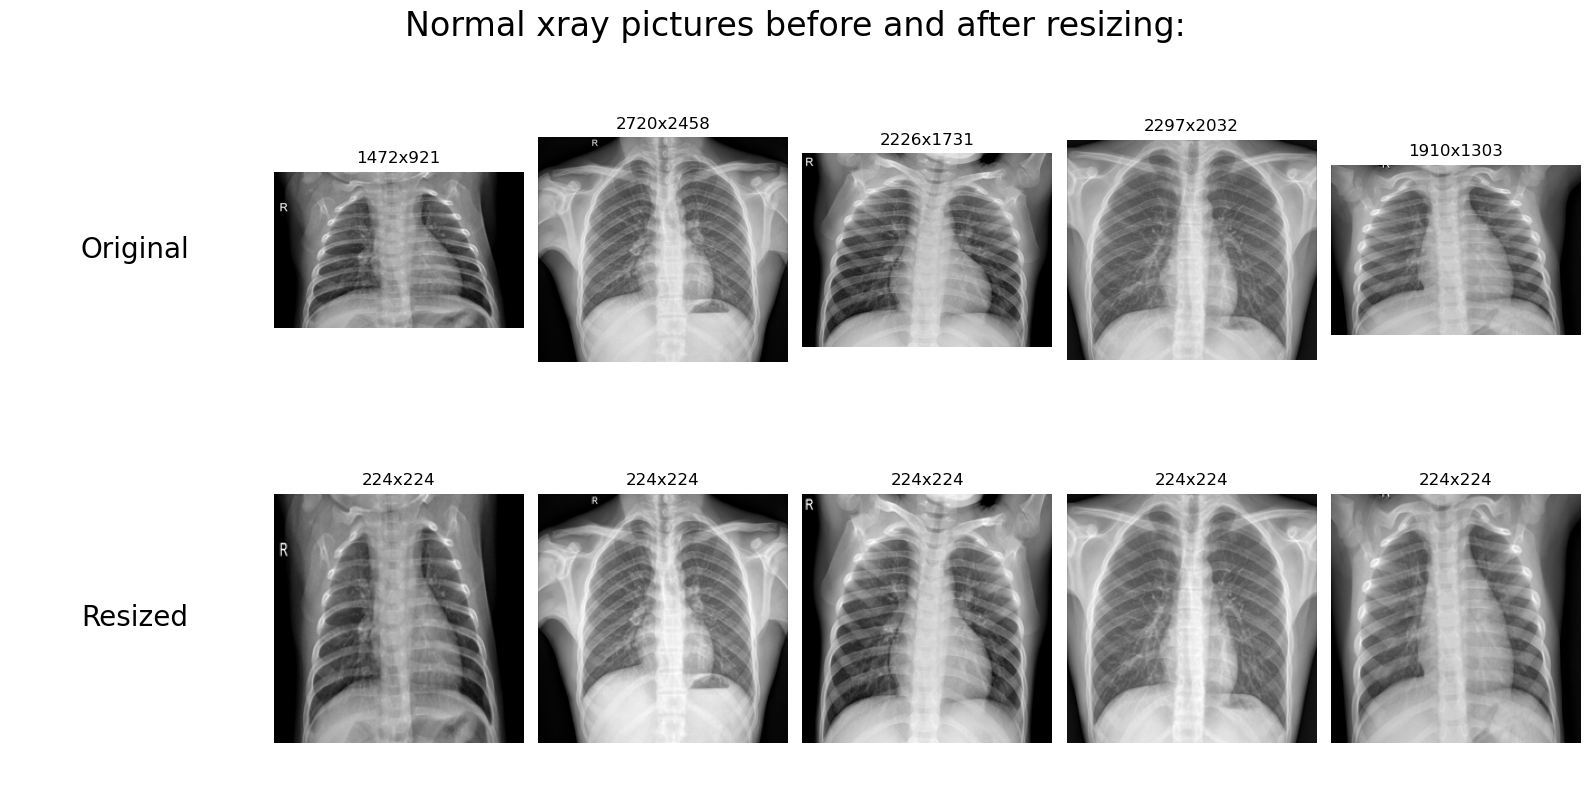

In [3]:
# Let's see how the images look like before and after resizing
sample_size = 5
image_size = (224, 224)  # Resize target

# Randomly sample images from each category
sampled_normal_images = np.random.choice(normal_images, sample_size, replace=False)
sampled_pneumonia_images = np.random.choice(pneumonia_images, sample_size, replace=False)

# Define the figure layout
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Normal xray pictures before and after resizing:", fontsize=24, y=1)

# Function to open, resize, and return an image
def load_and_resize_image(image_path, size):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    resized_image = image.resize(size)  # Resize image to target dimensions
    return image, resized_image

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

As we can observe from the resizing of the images, they look recognizable and there doesn't appear to be much of a significant loss of information following the resizing of the images.

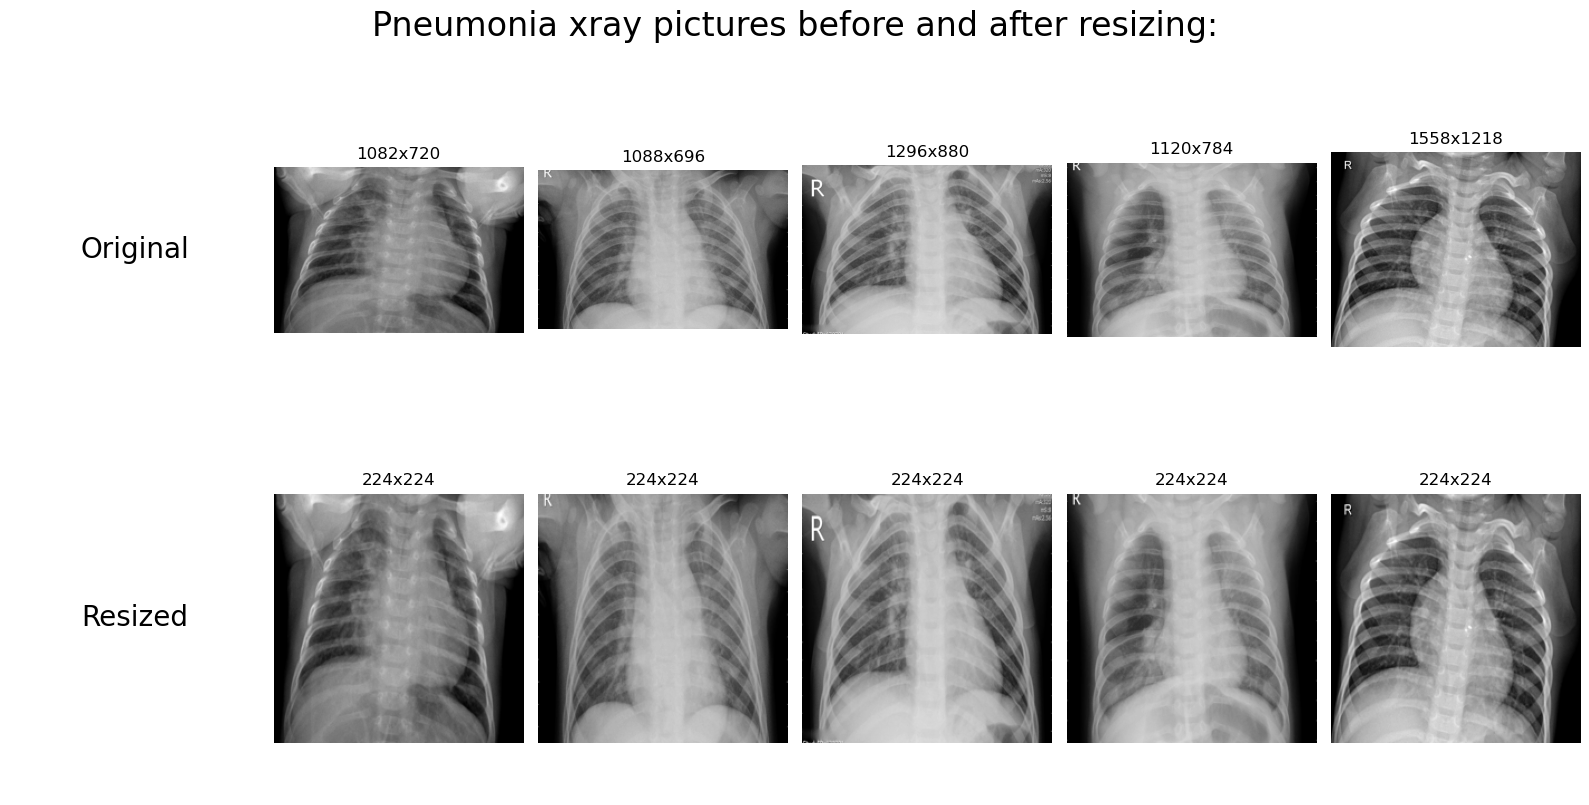

In [4]:
# Let's see how the pneumonia images look like before and after resizing
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Pneumonia xray pictures before and after resizing:", fontsize=24, y=1)

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

Pneumonia images seem to retain most of their information as well!

Using device: cpu
Class names: ['NORMAL', 'PNEUMONIA']


/Users/meliscemre/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/meliscemre/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Loss: 0.2853
Epoch [2/5], Loss: 0.1353
Epoch [3/5], Loss: 0.0491
Epoch [4/5], Loss: 0.0714
Epoch [5/5], Loss: 0.0421
Test Accuracy: 88.00%


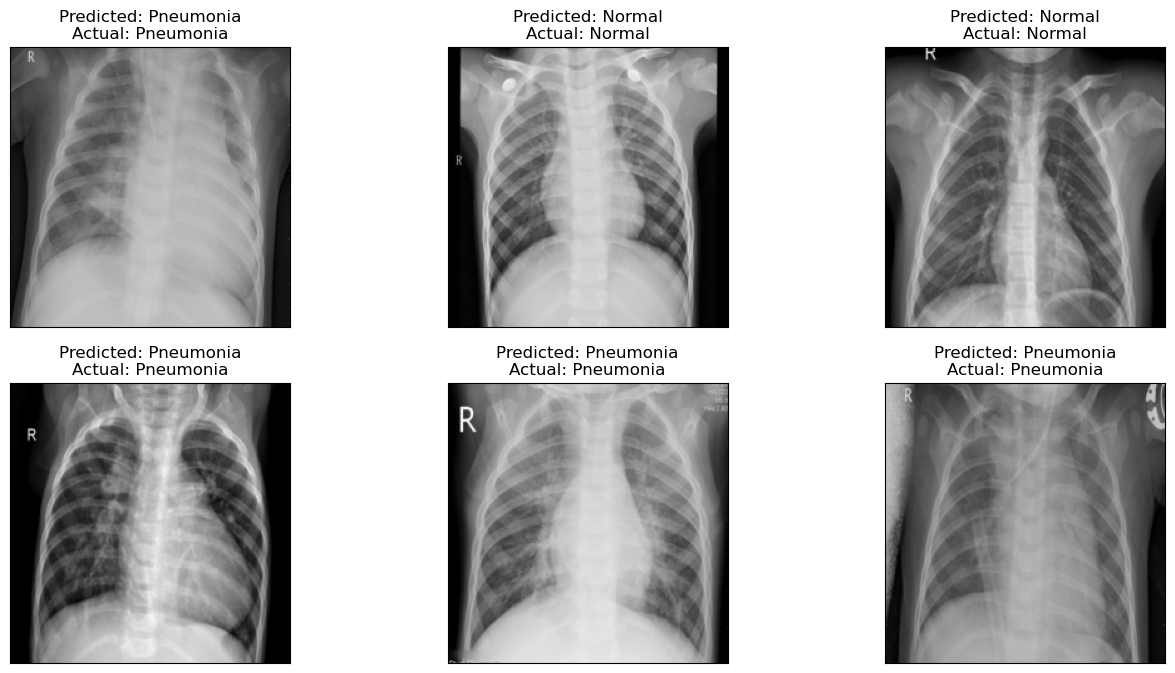

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 5  # Reduced epochs for quick testing
image_size = (224, 224)
num_samples = 100  # Use only up to 100 images for quick testing
num_samples_train = 500  # Use only up to 100 images for quick testing

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)  # Ensure we don't sample more than the dataset size
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets with up to 100 images
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")  # Output: ['NORMAL', 'PNEUMONIA']

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify final layer for binary classification
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Un-normalize
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


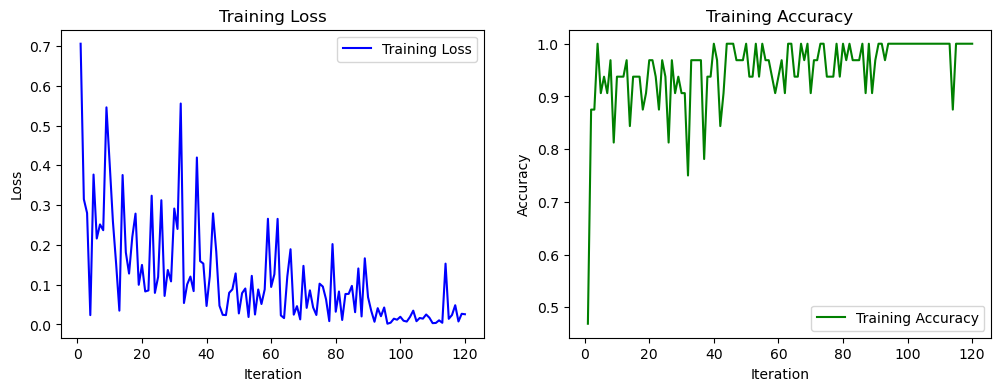

Epoch [4/4], Loss: 0.0409, Accuracy: 0.99
Test Accuracy: 90.00%


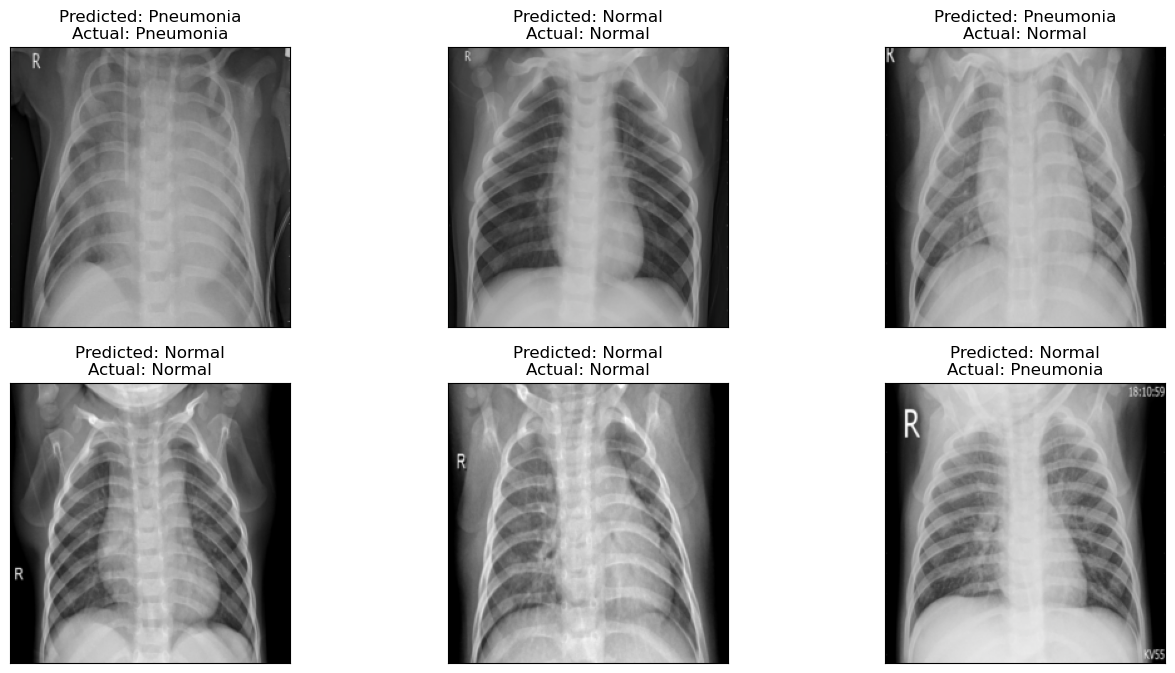

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 4
image_size = (224, 224)
num_samples = 100  # Use only up to 100 images for quick testing
num_samples_train = 1000  # Use only up to 100 images for quick testing

log_every = 10  # Log and plot every 10 iterations

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_iter = []
train_loss = []
train_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
iteration = 0
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

        # Log metrics
        iteration += 1
        train_iter.append(iteration)
        train_loss.append(loss.item())
        train_accs.append(acc)

        # Real-time plotting every `log_every` iterations
        if iteration % log_every == 0:
            clear_output(wait=True)
            fig = plt.figure(figsize=(12, 4))

            # Plot training loss
            plt.subplot(1, 2, 1)
            plt.plot(train_iter, train_loss, label='Training Loss', color='blue')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.title('Training Loss')
            plt.legend()

            # Plot training accuracy
            plt.subplot(1, 2, 2)
            plt.plot(train_iter, train_accs, label='Training Accuracy', color='green')
            plt.xlabel('Iteration')
            plt.ylabel('Accuracy')
            plt.title('Training Accuracy')
            plt.legend()

            plt.show()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {running_acc/len(train_loader):.2f}")

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


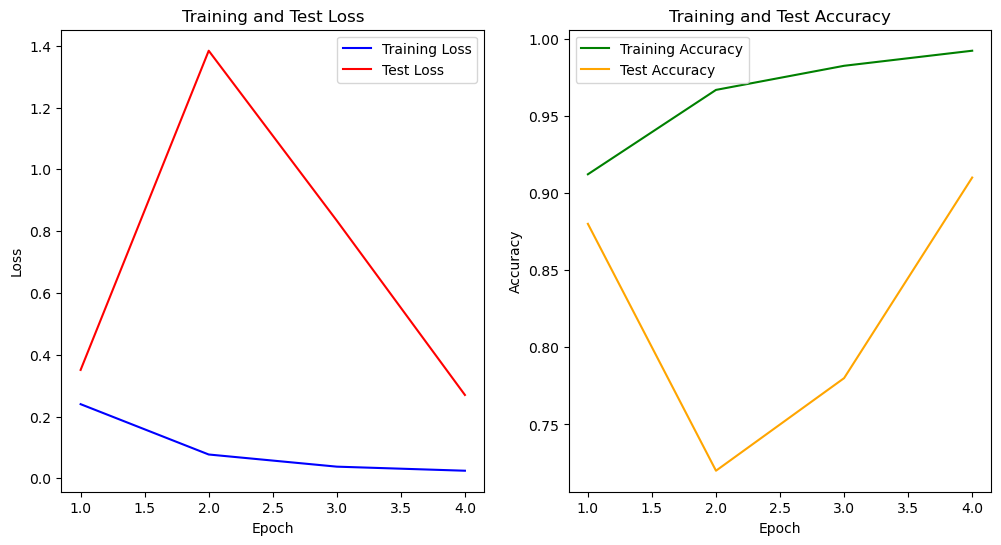

Final Test Accuracy: 91.00%


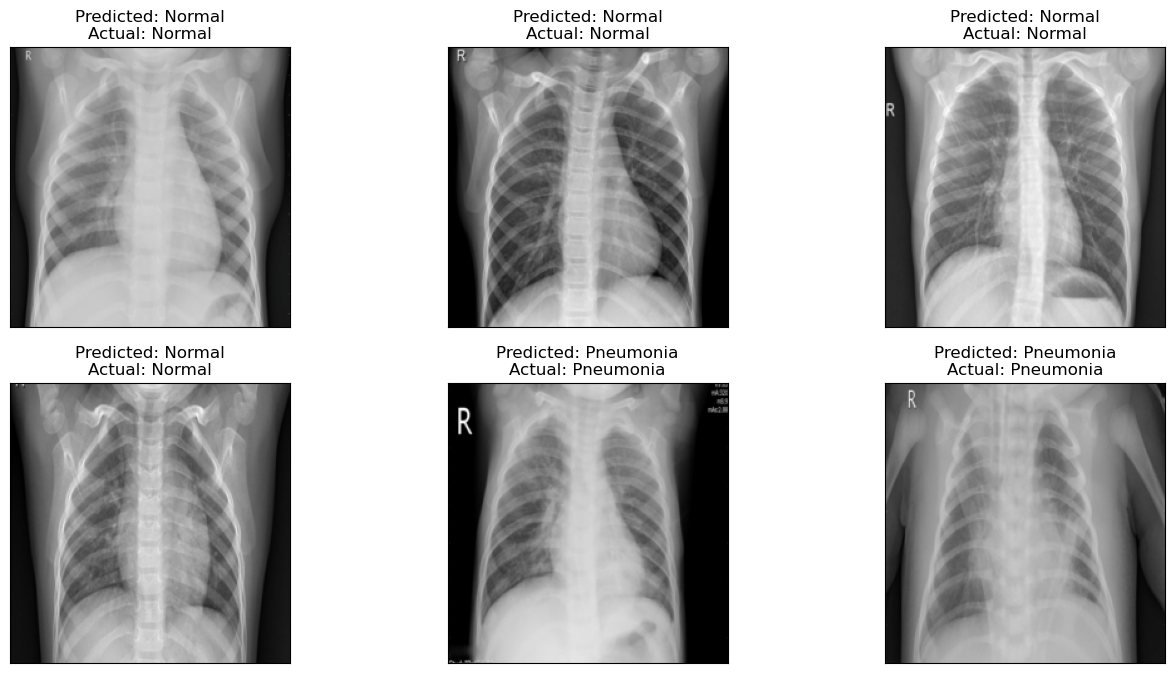

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 4
image_size = (224, 224)
num_samples = 100  # Use only up to 100 images for quick testing
num_samples_train = 1000  # Use up to 1000 images for training

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_losses = []
train_accs = []
test_losses = []
test_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

    # Average metrics for training
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = running_acc / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average metrics for testing
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = correct / total
    test_losses.append(avg_test_loss)
    test_accs.append(avg_test_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.2f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.2f}")

    # Real-time plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accs) + 1), train_accs, label='Training Accuracy', color='green')
    plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

# Final Test Evaluation
final_test_accuracy = 100 * test_accs[-1]
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


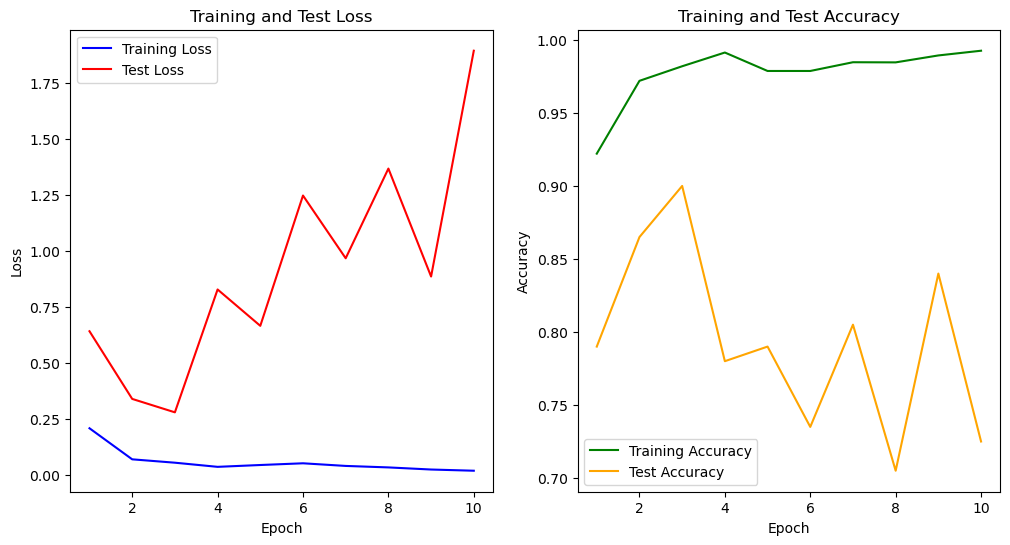

Final Test Accuracy: 72.50%


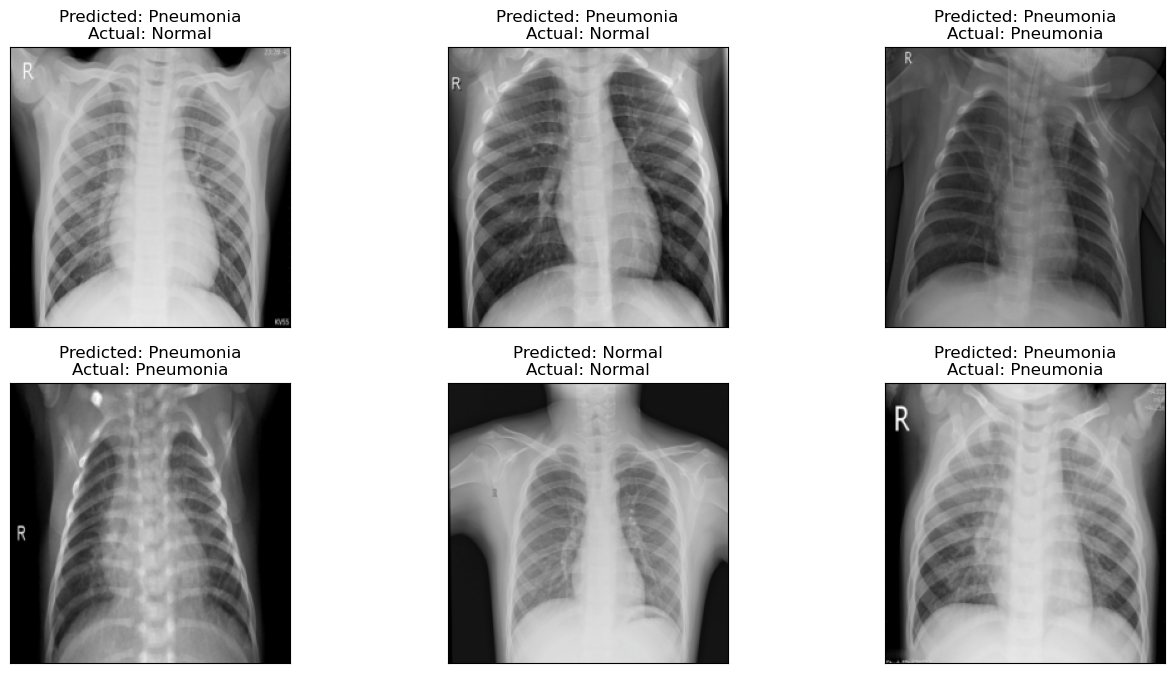

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 10
image_size = (224, 224)
num_samples = 200  # Use only up to 100 images for quick testing
num_samples_train = 1500  # Use up to 1000 images for training

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_losses = []
train_accs = []
test_losses = []
test_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

    # Average metrics for training
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = running_acc / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average metrics for testing
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = correct / total
    test_losses.append(avg_test_loss)
    test_accs.append(avg_test_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.2f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.2f}")

    # Real-time plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accs) + 1), train_accs, label='Training Accuracy', color='green')
    plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

# Final Test Evaluation
final_test_accuracy = 100 * test_accs[-1]
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 10
image_size = (224, 224)
num_samples = 500  # Use only up to 100 images for quick testing
num_samples_train = 1500  # Use up to 1000 images for training

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_losses = []
train_accs = []
test_losses = []
test_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

    # Average metrics for training
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = running_acc / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average metrics for testing
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = correct / total
    test_losses.append(avg_test_loss)
    test_accs.append(avg_test_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.2f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.2f}")

    # Real-time plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accs) + 1), train_accs, label='Training Accuracy', color='green')
    plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

# Final Test Evaluation
final_test_accuracy = 100 * test_accs[-1]
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


Using device: cpu
Class names: ['NORMAL', 'PNEUMONIA']


KeyboardInterrupt: 

![Screenshot 2024-11-09 at 15.43.30.png](<attachment:Screenshot 2024-11-09 at 15.43.30.png>)
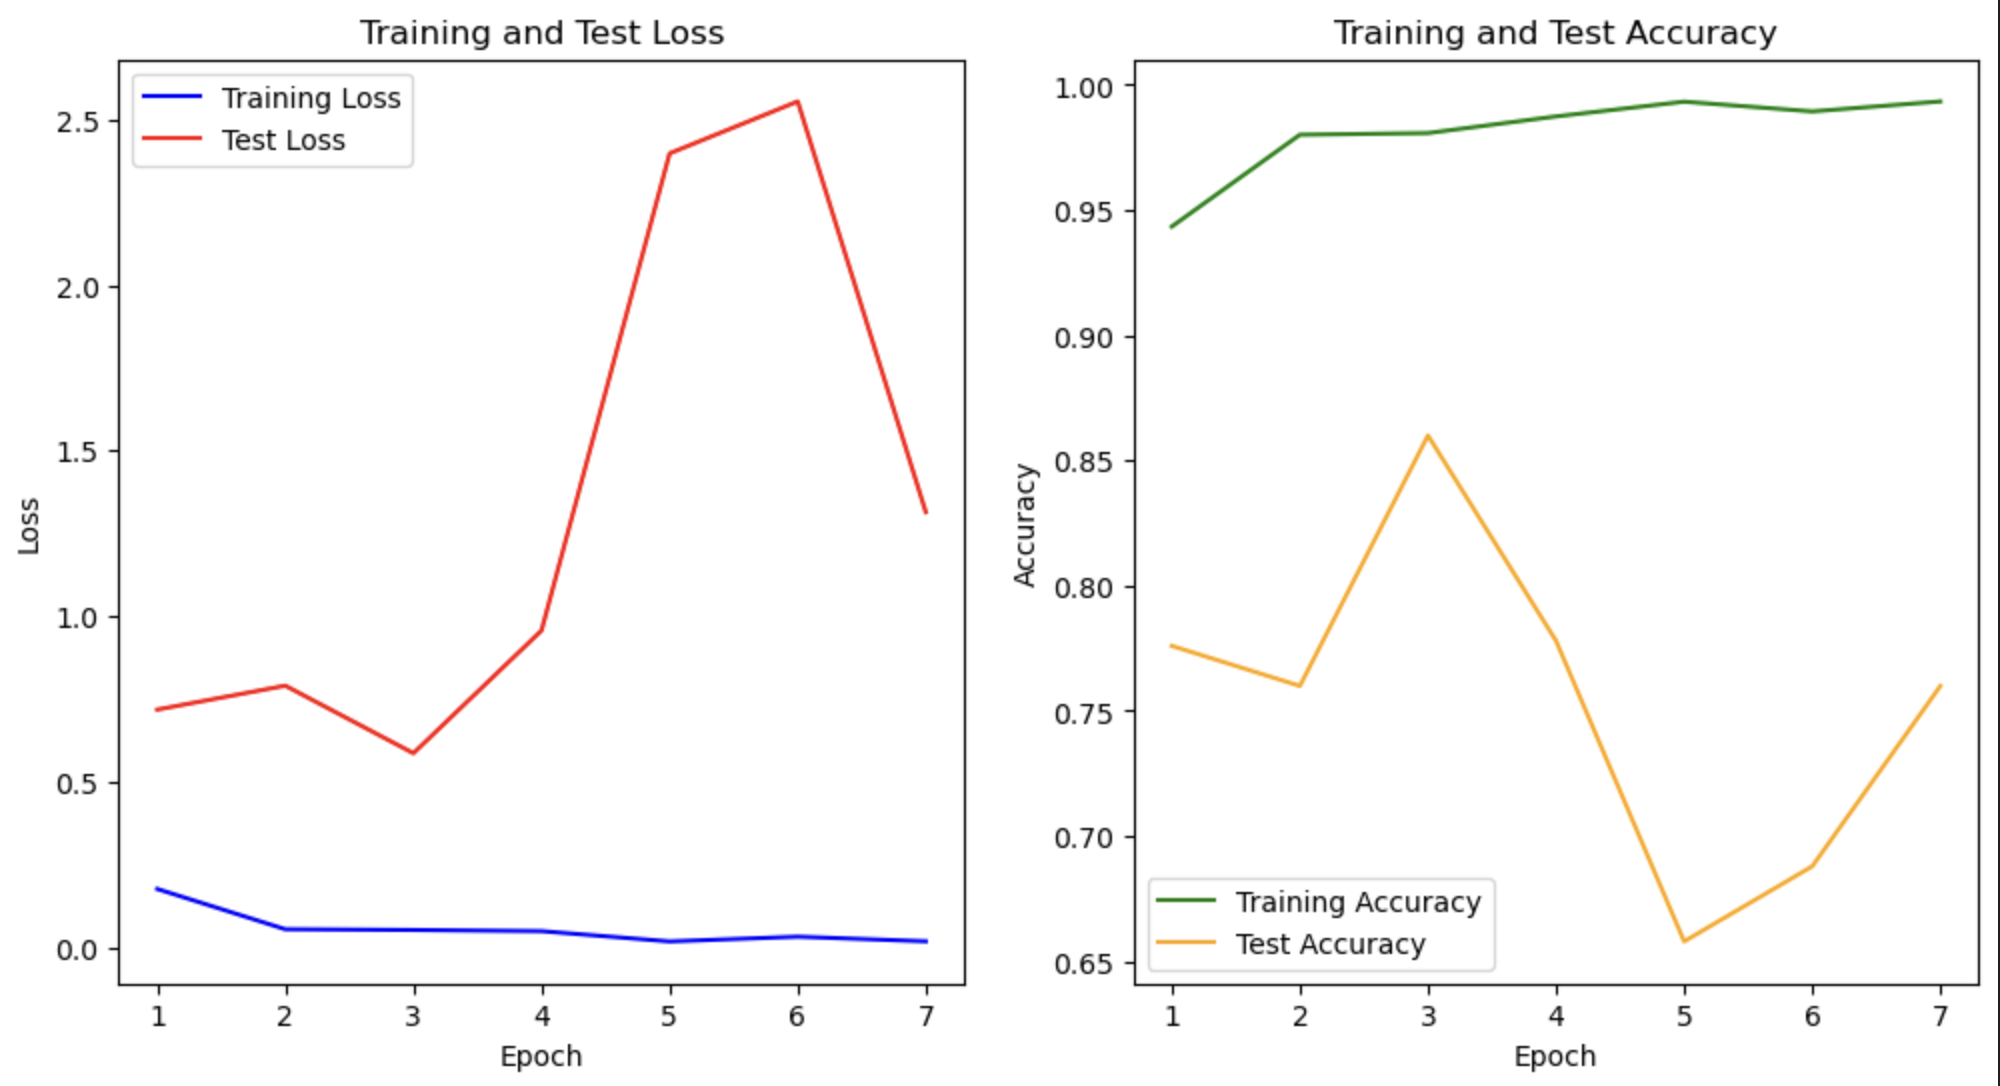

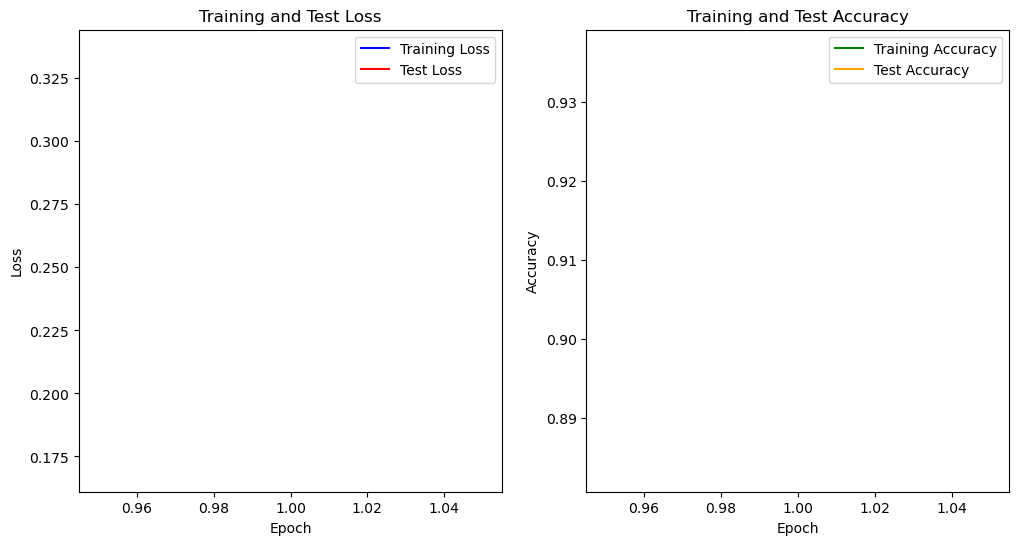

KeyboardInterrupt: 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from torchvision.models import ResNet18_Weights

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 3
image_size = (224, 224)
num_samples = 600  # Use only up to 600 images for quick testing
num_samples_train = 2000  # Use up to 2000 images for training

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Load pre-trained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_losses = []
train_accs = []
test_losses = []
test_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

    # Average metrics for training
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = running_acc / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average metrics for testing
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = correct / total
    test_losses.append(avg_test_loss)
    test_accs.append(avg_test_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.2f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.2f}")

    # Real-time plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accs) + 1), train_accs, label='Training Accuracy', color='green')
    plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

# Final Test Evaluation
final_test_accuracy = 100 * test_accs[-1]
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

# Define transformations for the training and testing data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder('path_to_your_dataset', transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for training and testing sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes in the dataset (2 classes: pneumonia or not)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    train_loss = []
    train_acc = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    return train_loss, train_acc

# Function to evaluate the model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_loss /= len(test_loader.dataset)
    test_acc = correct / total
    return test_loss, test_acc

# Train the model and evaluate it on the test set
num_epochs = 10
train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, num_epochs)
test_loss, test_acc = evaluate_model(model, test_loader, criterion)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training and testing loss
plt.figure(figsize=(10,5))
plt.title("Training and Testing Loss")
plt.plot(train_loss,label="Train Loss")
plt.plot([test_loss]*num_epochs,label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot training and testing accuracy
plt.figure(figsize=(10,5))
plt.title("Training and Testing Accuracy")
plt.plot(train_acc,label="Train Accuracy")
plt.plot([test_acc]*num_epochs,label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [12]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder('../../data/train', transform=transform)
test_dataset = datasets.ImageFolder('../../data/test', transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [13]:
import torch.nn as nn
from torchvision import models

# Load pre-trained ResNet18 model with the updated weights parameter
weights = models.ResNet18_Weights.IMAGENET1K_V1  # or models.ResNet18_Weights.DEFAULT for the latest weights
model = models.resnet18(weights=weights)

# Modify the final layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (Normal/Pneumonia)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [10]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


KeyboardInterrupt: 

In [14]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct_train / total_train
    
    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

KeyboardInterrupt: 

In [15]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder('../../data/train', transform=transform)
test_dataset = datasets.ImageFolder('../../data/test', transform=transform)

# Use 2000 samples from train data and 300 samples from test data
train_indices = np.random.choice(len(train_dataset), 2000, replace=False)
test_indices = np.random.choice(len(test_dataset), 300, replace=False)

train_subset = Subset(train_dataset, train_indices)
test_subset = Subset(test_dataset, test_indices)

# Create dataloaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

import torch.nn as nn
from torchvision import models

# Load pre-trained ResNet18 model with the updated weights parameter
weights = models.ResNet18_Weights.IMAGENET1K_V1  # or models.ResNet18_Weights.DEFAULT for the latest weights
model = models.resnet18(weights=weights)

# Modify the final layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (Normal/Pneumonia)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct_train / total_train
    
    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/4, Loss: 0.1947, Train Accuracy: 92.70%, Test Accuracy: 73.33%
Epoch 2/4, Loss: 0.0777, Train Accuracy: 97.10%, Test Accuracy: 77.33%
Epoch 3/4, Loss: 0.0463, Train Accuracy: 98.50%, Test Accuracy: 65.00%
Epoch 4/4, Loss: 0.0461, Train Accuracy: 98.60%, Test Accuracy: 84.67%


In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder('../../data/train', transform=transform)
test_dataset = datasets.ImageFolder('../../data/test', transform=transform)

# Use 2000 samples from train data and 300 samples from test data
train_indices = np.random.choice(len(train_dataset), 3000, replace=False)
test_indices = np.random.choice(len(test_dataset), 400, replace=False)

train_subset = Subset(train_dataset, train_indices)
test_subset = Subset(test_dataset, test_indices)

# Create dataloaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

import torch.nn as nn
from torchvision import models

# Load pre-trained ResNet18 model with the updated weights parameter
weights = models.ResNet18_Weights.IMAGENET1K_V1  # or models.ResNet18_Weights.DEFAULT for the latest weights
model = models.resnet18(weights=weights)

# Modify the final layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (Normal/Pneumonia)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct_train / total_train
    
    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/4, Loss: 0.1532, Train Accuracy: 94.63%, Test Accuracy: 89.25%
Epoch 2/4, Loss: 0.0682, Train Accuracy: 97.50%, Test Accuracy: 68.25%
Epoch 3/4, Loss: 0.0602, Train Accuracy: 97.73%, Test Accuracy: 76.75%
Epoch 4/4, Loss: 0.0506, Train Accuracy: 98.10%, Test Accuracy: 88.25%


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder('../../data/train', transform=transform)
test_dataset = datasets.ImageFolder('../../data/test', transform=transform)

# Use 2000 samples from train data and 300 samples from test data
train_indices = np.random.choice(len(train_dataset), 2000, replace=False)
test_indices = np.random.choice(len(test_dataset), 300, replace=False)

train_subset = Subset(train_dataset, train_indices)
test_subset = Subset(test_dataset, test_indices)

# Create dataloaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

# Load pre-trained ResNet18 model with the updated weights parameter
weights = models.ResNet18_Weights.IMAGENET1K_V1  # or models.ResNet18_Weights.DEFAULT for the latest weights
model = models.resnet18(weights=weights)

# Freeze the first 15 layers
child_counter = 0
for child in model.children():
    if child_counter < 15:
        for param in child.parameters():
            param.requires_grad = False
    child_counter += 1

# Modify the final layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (Normal/Pneumonia)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct_train / total_train
    
    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/4, Loss: 0.3292, Train Accuracy: 86.25%, Test Accuracy: 68.00%
Epoch 2/4, Loss: 0.1844, Train Accuracy: 92.95%, Test Accuracy: 85.00%
Epoch 3/4, Loss: 0.1612, Train Accuracy: 93.40%, Test Accuracy: 87.67%
Epoch 4/4, Loss: 0.1485, Train Accuracy: 94.15%, Test Accuracy: 81.00%
